# Dimensionality Reduction
page 205<br>
See
- https://github.com/ageron/handson-ml/blob/master/08_dimensionality_reduction.ipynb,
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.memmap.html, and
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html for detailed information concerning this notebook.

for useful information.<br>
Many datasets have thousands or even millions of features (or dimensions) per instance. This not only makes training very slow but also makes it very hard to find models that generalize well. This problem is known is the *curse of dimensionality*. Apart from speeding up training, dimensionality reduction is also useful for data visualization (or *DataViz*), in particular if the dimensions are reduced down to 2 or 3.<br><br>
**Warning / caution**<br>
Reducing dimensionality does lose some information (just like compressing an image to JPEG can degrade its qualtiy), so even though it will speed up training, it may also  make your system perform slightly worse. It also makes your pipelines a bit more complex and thus harder to maintain. So you should first try to train your system with the original data before considering using dimensionality reduction if training is too slow. In some cases, however, reducing the dimenionality of the training data may filter out some noise and unnecessary details and thus result in higher perfromacne (but in general it won't; it will just speed up training).
## The curse of Dimensionality
page 206<br>
The higher the dimension of a volume (sphere or cube for simplicity), the higher is the volume fraction at the outer rim of the cube. For example, a 2-D square of size 1-by-1 has only about 0.4% of its volume (in 2-D: surface) in the outer rim with thickness 0.001. But for a 10000-D hypercube, this fraction increases to more than 99.999999%. That means, that almost every person is extreme in some aspect, if enough aspects (features) are taken into account.<br>
The trouble begins with the associated fact that the average distance of two random points in a unit cube increases from 0.52 in 2D to 0.66 in 3D and to 408.25 in 1000000-D. As a result, high-dimensional datasets are sparse. Even if an algorithm manages to fit the training data well it will usually have to extrapolate very far to make a prediction of a new instance. In short, high-dimensional data is prone to overfitting. This is the curse of dimensionality.
## Main Approaches for Dimensionality Reduction: Projection and Manifold Learning
page 207<br>
Reducing the dimensionality of the training set before training a model will definitely speed up training, but it may not always lead to a better or simpler solution; the outcome always depends on the specific dataset.<br><br>
In most real-world datasets with high dimension, at least some and often many dimensions are either almost constant or highly correlated with other dimensions. That means, that the training instances actually lie on or close to a lower-dimensional subspace. The idea of **Projection** is that projecting the instances onto such subspace can reduce the dimension significantly while not losing too much information. See also Figure 8-2 on page 208.<br><br>
A d-dimensional manifold like the Swiss roll (Figure 8-6 on page 211) lies in n-dimensional space (with $d<n$) that locally resembles a d-dimensional hyperplane (n=3 and d=2 for the Swiss roll). The *manifold assumption* (or *manifold hypothesis*) states that most real-world high-dimensional datasets actually lie close to a much lower-dimensional manifold. This is often true. For example, randomly generating instances with features of the MNIST dataset will only very seldomly (by chance) result in an instance that looks like one of the MNIST digits. That means that the MNIST instances use only a small fraction of the feature volume. Many dimensions can be disregarded (e.g. the rim of the MNIST pictures is almost always white). **Manifold Learning** aims to model the manifold on whith the training instances lie.
## PCA
page 211<br>
*Principal Component Analysis* (PCA) first finds the hyperplane which the data is closest to and then projects the data onto that hyperplane. PCA is by far the most popular dimensionality reduction technique.
### Preserving the Variance
page 211<br>
As can be seen from Figure 8-7, the goal is to project onto that axes that preserve most of the variance. That this makes sense can also be justified with the related fact that projection on such an axis (preserving maximal variance) minimizes the mean squared distance of the orignal dataset to the projected dataset, thus minimizing the loss of information.
### Principal Components
page 212<br>
PCA consecutively find the (next) axis with the hightest (remaining) variance and continues to do so until the number of axes equals the number of dimensions. The unit vector that lies along the i-th axis is called the i-th *principal component*. Note that the sign / phase of each axis might depend on convention! All these axes are orthogonal to each other and they form a basis. The principal components of a training set can be found by diagonalizing the variance-covariance matrix or by *Singular Value Decomposition* (SVD). SVD decomposes the training set matrix $X$ into the dot product of 3 matrices: $X=U\cdot\Sigma\cdot V^T$, where $V^T$ contains all the principal components $c_{j}$ that we are looking for:
$$V^T=\begin{pmatrix}
c_{11}&c_{12}&\ldots&c_{1j}&\ldots&c_{1n}\\
c_{i1}&c_{i2}&\ldots&c_{ij}&\ldots&c_{in}\\
\vdots&\vdots&\ldots&\vdots&\ldots&\vdots
\end{pmatrix}\,.$$
We can implement the singular value decomposition in Python by using NumPy's "svd()" function. The according output contains $V$, from which we can take the principal components.

In [1]:
# first, generate some noisy data: 60 instances with 3 features each
import numpy as np                               # import numpy
np.random.seed(4)                                # set seed for random numbers
m = 60                                           # number of instances
w1, w2 = 0.1, 0.3                                # superposition weights for third feature
noise = 0.1                                      # noise strength
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5 # random angle in [0, (3/2)*pi] - 0.5 for each instance
X = np.empty((m, 3))                             # data container
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m)/2 # infer first feature from angle (+ noise)
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2            # infer second feature in a similar way
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)         # superpose both features and add noise
print(X[0:7])                                    # show the first few instances (not all of them)
# now, apply the svd() function to that data
X_centered = X - X.mean(axis=0)                  # very important: centering the data
U, s, V = np.linalg.svd(X_centered)              # apply svd
c1 = V.T[:, 0]                                   # principal component 1
c2 = V.T[:, 1]                                   # principal component 2
c3 = V.T[:, 2]                                   # principal component 3
print(c1, c2, c3)                                # print the principal components

[[-1.01570027 -0.55091331 -0.26132626]
 [-0.00771675  0.59958572  0.03507755]
 [-0.95317135 -0.46453691 -0.24920288]
 [-0.92012304  0.21009593  0.02182381]
 [-0.76309739  0.158261    0.19152496]
 [ 1.11816122  0.32508721  0.31710572]
 [-1.02258878 -0.64384064 -0.13368695]]
[0.93636116 0.29854881 0.18465208] [-0.34027485  0.90119108  0.2684542 ] [-0.08626012 -0.31420255  0.94542898]


**General note**<br>
The direction of the principal components s not stable: if you perturb the training set slightly and run PCA again, some of the new PCs may point in the opposite direction of the original PCs. However, they will generally still lie on the same axis. In some cases, a pair of PCs may even rotate or swap, but the plane they define will generally remain the same.<br><br>
**Warning / caution**<br>
PCA assumes that the dataset is centered around the origin. As we will see, Scikit-Learn's PCA classes take care of centering the data for you. However, if you implement PCA yourself (as in the preceding example), or if you use other libraries, don't forget to center the data first.
### Projecting Down to d Dimensions
page 213<br>
A lower dimensional dataset can be obtained by using less than all principal components. To preserve as much information as possible, one has to take into account the principal component associated with the (next) largest variance. Projecting the dataset on a d-dimensional hyperplane while preserving maximal variance is achieved by calculating
$$X_{\rm d-proj}=X\cdot W_{\rm d}\,,$$
where $W_{\rm d}$ is composed of the first $d$ columns of $V^T$. This can be implemented as easily as follows.

In [2]:
W2 =V.T[:, :2]          # establish W_d with d=2
X2D =X_centered.dot(W2) # infer X2D from the above formula
print(X2D[0:7])         # print the first seven rows (they have two components instead of three)

[[-1.26203346 -0.42067648]
 [ 0.08001485  0.35272239]
 [-1.17545763 -0.36085729]
 [-0.89305601  0.30862856]
 [-0.73016287  0.25404049]
 [ 1.10436914 -0.20204953]
 [-1.27265808 -0.46781247]]


### Using Scikit-Learn
page 214<br>
Scikit-Learn also implements PCA via SVD. The following code does the same job we did in a more manual way above.

In [3]:
from sklearn.decomposition import PCA # import PCA
pca = PCA(n_components = 2)           # specify the number of componentes and establish a class
X2D = pca.fit_transform(X)            # apply the operation to the data
print(X2D[0:7])                       # print the transformed data
p_comp_1 = pca.components_.T[:,0]     # get the first principal component ...
print(p_comp_1)                       # ... and print it

[[ 1.26203346  0.42067648]
 [-0.08001485 -0.35272239]
 [ 1.17545763  0.36085729]
 [ 0.89305601 -0.30862856]
 [ 0.73016287 -0.25404049]
 [-1.10436914  0.20204953]
 [ 1.27265808  0.46781247]]
[-0.93636116 -0.29854881 -0.18465208]


Note that the transformed data as well as the principal components are the same as above but with an opposite sign!
### Explained Variance Ratio
page 214<br>
Scikit-Learn also calculates the fraction of the total variance associated with each principal component. This fraction is accessible via the "explained\_variance\_ratio\_"variable.

In [4]:
var_list = pca.explained_variance_ratio_ # list containing the variances of the first 2 principal components (3 total)
print(var_list)                          # print the list
print(sum(var_list))                     # the 3rd principal component contains less than 1.2% of the total variance

[0.84248607 0.14631839]
0.988804464429311


### Choosing the Right Number of Dimensions
page 215<br>
Data visualization usually requires reducing the dimension down to 2 or 3. For other dimension reduction applications, setting the final number of dimensions is somewhat arbitrary. So instead of determining the number of dimensions, one might rather want to determine the amount of variance preserved by the final dataset and then use as many dimensions as required to achieve that variance. The following code applies PCA and shows the number of dimensions required to preserve 95% of the initial variance.

In [5]:
from sklearn.datasets import fetch_openml                # use Scikit-Learn ...
mnist = fetch_openml('mnist_784')                        # ... to import the MNIST data
X = mnist.data.astype("float32");                        # identify features ...
y = mnist.target.astype("int64");                        # ... and labels
from sklearn.model_selection import train_test_split     # split that data into ...
X_train, X_test, y_train, y_test = train_test_split(X,y) # ... training and test sets
pca = PCA()                                              # establish a PCA class
pca.fit(X_train)                                         # apply it to the training features
cumsum = np.cumsum(pca.explained_variance_ratio_)        # calculate the total accumulated variance for each dimension
d = np.argmax(cumsum >= 0.95) + 1                        # show that dimension where 95% have been reached (the +1 ...
print(len(X_train[0, :]))                                # ... is necessary as Python starts with 0; print the ...
print(d)                                                 # ... initial and final number of dimensions

784
154


Now, one could set the number of desired dimension and run PCA again, with "n_components=d". However, Scikit-Learn offers an even better option: instead of specifying an integer for "n_components" (namely "d") in the second round, one can specify a float (noninteger) between 0.0 and 1.0 in the first round ("n_components=0.95"). This will be interpreted as the amount of variance to be preserved so Scikit-Learn can directly reduce the dataset to the required number of dimensions.

In [6]:
pca = PCA(n_components=0.95)           # note the float (0.95) that specifies the amount of variance to be preserved
X_reduced = pca.fit_transform(X_train) # reduce the number of training features while preserving 95% of variance
print(pca)                             # print the PCA class
print(X_reduced.shape)                 # print the number of features after PCA

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
(52500, 154)


It can also be very helpful to plot the total preserved variance vs. the number of dimensions / principal components taken into account, see Figure 8-8.
### PCA for Compression
page 216<br>
The above code cell shows that PCA can be used to compress the MNIST dataset to less than 20% of its original size ($154\times5=750+20=770<784$) while preserving more than 95% of the variance. Decompression will transforms the reduced dataset (154 dimensions) back into the full feature space (784 dimensions). Of course, the restored data will slightly differ from the original data since some information has been lost (corresponding to the loss of less than 5% variance). In Scikit-Learn, such decompression is achieved by applying the "inverse_transform()" method.

In [7]:
X_recovered = pca.inverse_transform(X_reduced) # apply the inverse transformation
X_recovered.shape                              # show the shape of the decompressed dataset

(52500, 784)

For comparison, let's plot original and compressed-decompressed instances!

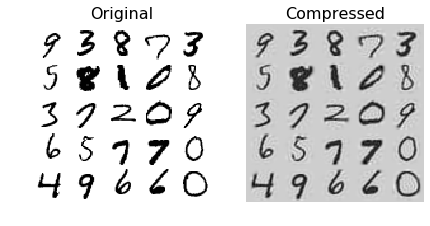

In [8]:
# code taken from Github link above; first define a function for plotting digits
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
# now use this function to plot original and compressed-decompressed digits
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

The compression-decompression works very well: there is a change in background color but the digits look very much the same as before. The equation used form the inverse transformation is
$$X_{\rm recoverd}=X_{\rm d-proj}\cdot W_{\rm d}^T\,.$$
### Incremental PCA
page 217<br>
A problem with the above implementation of PCA (via SVD) is that the entire training set needs to fit in memory. Incremental PCA  (IPCA) uses mini-batches and tranforms them one at a time. This is useful for large datasets and if mini batches arrive incrementally (one at a time) as might be the case for online applications. To implement IPCA, we rely once more on Scikit-Learn, using its "IncrementalPCA" class. As before, we reduce the MNIST dataset from 784 features to 154 features. To do this incrementally, we use NumPy's "array_split()" function to split the dataset into 100 mini-batches. For mini-batches, one should call the "partial_fit()" method instead of "fit()".

In [9]:
# using IPCA
from sklearn.decomposition import IncrementalPCA   # import the relevant class from Scikit-Learn ...
inc_pca = IncrementalPCA(n_components=154)         # ... and establish an instance of that class, using 154 dimensions
n_batches = 100                                    # set the number of mini-batches
for X_batch in np.array_split(X_train, n_batches): # loop through the mini-batches ...
    inc_pca.partial_fit(X_batch)                   # ... and incrementally "learn" the PCA transformation
X_reduced_1 = inc_pca.transform(X_train)           # now, apply the PCA transformation to the entire training data
X_reduced_1.shape                                  # show the shape of the transformed data

(52500, 154)

Numpy's "memmap" (memory map) class stores a Python variable on disk and allows to treat this variable as if it were in memory. This can also be used for large datasets. Here, we use it for an alternative approach to IPCA. See https://docs.scipy.org/doc/numpy/reference/generated/numpy.memmap.html for details on the memory map.

In [10]:
# using NumPy's memory map
filename = "datasets/chapter8/my_mnist.data"       # establish a filename
m, n = X_train.shape                               # determine the shape of the transformed data (from above)
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n)) # establish a memory map and write ...
X_mm[:] = X_train                                  # ... X_train into it
del X_mm                                           # according to the Github link, this ensures the saving of the file
# load mini-batches of the memory map and feed them to IPCA
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n)) # open the file with the memory map
batch_size = m // n_batches                        # batch_size = floor(m/n)
inc_pca = IncrementalPCA(n_components=154,batch_size=batch_size) # establish an ICPA algorithm with 154 dimensions ...
inc_pca.fit(X_mm)                                  # ... and a specified batch size; apply IPCA to the memory map
X_reduced_2 = inc_pca.transform(X_train)           # now, apply the PCA transformation (trained on the memory map) ...
X_reduced_2.shape                                  # ... to the entire training data and show the resulting shape

(52500, 154)

### Randomized PCA
page 218<br>
Randomized PCA is a stochastic algorithm that quickly finds an approximation (!) of the firts d principal components. It's computational complexity is $\mathcal{O}(m\times d^2)+\mathcal{O}(d^3)$. For $d<m$, randomized PCA can be much faster than normal PCA, whose complexity is $\mathcal{O}(m\times n^2)+\mathcal{O}(n^3)$

In [11]:
rnd_pca = PCA(n_components=154, svd_solver="randomized") # establish an instance of Scikit-Learn's randomized PCA
X_reduced = rnd_pca.fit_transform(X_train)               # apply the randomized PCA
X_reduced.shape                                          # show the shape of the transformed data

(52500, 154)

## Kernel PCA
page 218<br>
For Support Vector Machines (SVMs, see Chapter 5), we discussed the kernel trick. It allows to get results for certain calculations without actually doing the corresponding calculation. Instead, the results are obtained from a much simpler default calculation by virtue of simple tranforms. E.g. for SVMs, a linear decision boundary in high-dimensional feature space may correspond to a much more complex decision boundary in the original feature space.<br>
The same kind of tricks also work for PCA. This enables complex nonlinear projections for dimensionality reduction to run fast with *Kernel PCA*. Often, this can be used to preserve clusters or to unroll datasets that lie close to a twisten manifold (e.g. the Swiss roll, see the third link above for details).

In [12]:
from sklearn.datasets import make_swiss_roll                        # import swiss roll maker
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)  # make 1000 points (with noise) on a Swiss roll
print(X.shape)                                                      # shape of 3D data (features) 
from sklearn.decomposition import KernelPCA                         # import kernelized PCA
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04) # establish a PCA instance with an RBF kernel
X_reduced = rbf_pca.fit_transform(X)                                # apply it to the features
print(X_reduced.shape)                                              # shapee of reduced data (features)

(1000, 3)
(1000, 2)


Plot the results for different kernels by using code from the Github link above.

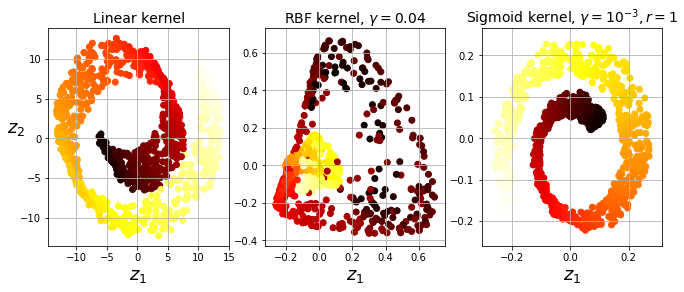

In [13]:
# use linear, rbf, and sigmoid kernels
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)
# establish a figure
plt.figure(figsize=(11, 4))
# loop through subplots, i.e., through different kernels
for subplot, pca, title in ((131, lin_pca, "Linear kernel"),
                            (132, rbf_pca, "RBF kernel, $\gamma=0.04$"),
                            (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    # apply the kernelized PCA on the feature data
    X_reduced = pca.fit_transform(X)
    # plot the transformed data
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    plt.grid(True)
    # put z_2 label on y axis if first subplot
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
# show it all
plt.show()

### Selecting a Kernel and Tuning the Hyperparameters
page 219<br>
PCA - kernelized or not - is an unsupervised learning algorithm so there is not an immediate performance measure. But usually, (k)PCA is used as preparation step for a supervised learning algorithm. So one can use grid search to identify the hyperparameters (number of dimensions, kernel, etc.) that lead to the highest performance measure for the subsequent supervised machine learning task. Such a scheme is implemented below.

In [14]:
from sklearn.model_selection import GridSearchCV    # import grid search
from sklearn.linear_model import LogisticRegression # use some logistic regression algorithm for the supervised task
from sklearn.pipeline import Pipeline               # a pipeline is also necessary
clf = Pipeline([                                    # establish a pipeline with ...
        ("kpca", KernelPCA(n_components=2)),        # ... kernelized PCA and ...
        ("log_reg", LogisticRegression())           # ... logistic regression
    ])
param_grid =[{                                      # also establish the grid vor grid search
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]
grid_search = GridSearchCV(clf, param_grid, cv=3)   # put everything together and use cross validation
y = t > 6.9                                         # seems to be necessary (search for this in code of Github link)
grid_search.fit(X, y)                               # train the models
print(grid_search.best_params_)                     # show the best model

/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Another way to get some performance measure is to apply the (kernelized) PCA, reconstruct original features from the compressed dataset, and measure the reconstruction error. However, such performance measure should also give credit for the amount of compression that has been attained. Otherwise, doing no compression at all would yield the "best" result. In addition, the reconstruction process might be inhibited by the type of kernel used, see discussion on pages 220 and 221. The relevant code follow next.

In [15]:
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf",             # project to 2D using kPCA with radial basis ...
                    gamma = 0.0433, fit_inverse_transform = True) # ... functions and prepare the reconstuction
X_reduced = rbf_pca.fit_transform(X)                              # apply the kPCA (with RBF kernel)
X_preimage = rbf_pca.inverse_transform(X_reduced)                 # try to reconstruct the original data
from sklearn.metrics import mean_squared_error                    # import mean squared error as performance measure
mean_squared_error(X, X_preimage)                                 # calculate and show the performance measure

32.786308795766125

**General note**<br>
By default, "fit_inverse_transform=False" and "KernelPCA" has no "inverse_transform()" method. This method only gets created when you set "fit_inverse_transform=True".
## LLE
page 221<br>
*Locally Linear Embedding* is another nonlinear dimensionality reduction (NLDR) technique. As the name suggests, it is linear only on a local scale. For some distance measure (not specified here), LLE computes each instance's distance to neighboring instances and then tries to find a low-dimensional representation of the data where these distances are well preserved. LLE is powerful for unrolling manifolds like the Swiss roll, in particular if there is not much noise. The following code nicely unrolls a Swiss roll. Note that distances are only locally preserved: on the large scale, the reduced dataset seems to be twisted.

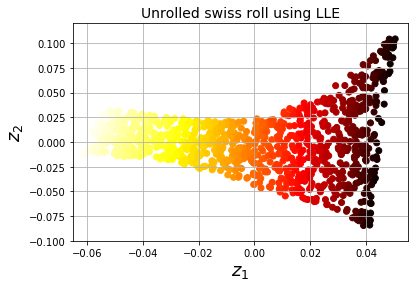

In [16]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41) # use "random_state=41" to make the figure look ...
from sklearn.manifold import LocallyLinearEmbedding                # like in the book (sometimes up to mirroring); ...
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)       # ... also import LLE; establish an LLE instance
X_reduced = lle.fit_transform(X)                                   # train the LLE algorithm
# plot the figure using code from the Github link above
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

Let's be more specific! LLE first identifies the k nearest neighbors for each instance (k=10 in the above example code). Then, LLE tries to express each instance in terms of its k nearest neighbors. This is done by trying to minimize the distance between that instance and a linear combination of its k nearest neighbors. The coefficients for these linear combinations (all m instances have k nearest neighbors) are stored in the $m\times k$ matrix $W_0$:
$$W_0={\rm argmin}_W\sum_{i=1}^m\left\|x^{(i)}-\sum_{j=1}^mw_{i,j}x^{(j)}\right\|^2\,,$$
where $w_{i,j}=0$ if $x^{(j)}$ does not belong to the k nearest neighbors of $x^{(i)}$ and $\sum_jw_{i,j}=0$ for all instances $i$. Note that this task is nontrivial if the k nearest neighbors do not span the feature space, e.g., when k<n (with n as the number of features). After the weight matrix $W$ has been established, the next and final step is to find m instances $z1{(i)}$ (i=1,...,m) in d dimensions (where d<n) that preserve the local relationships as much as possible. That is, if $z^{(i)}$ is the image of the instance $x^{(i)}$, we want to achieve a minimal distance between $z^{(i)}$ and $\sum_{j=1}^mw_{i,j}z^{(j)}$:
$$Z_0={\rm argmin}_Z\sum_{i=1}^m\left|z^{(i)}-\sum_{j=1}^mw_{i,j}z^{(j)}\right|^2\,.$$
Then, $Z_0$ is the $m\times d$ matrix containing m compressed instances, each with dimension d. Note that here, the instances are varied while in the first step, the weights have been varied. Scikit-Learn's implementation of the LLE algorithm has computational complexity $\mathcal{O}(m\log(m)n\log(k))$ for finding the k nearest neighbors, $\mathcal{O}(mnk^3)$ for optimizing the weights, and $\mathcal{O}(dm^2)$ for constructing the d-dimensional representation. The last term makes the algorithm scale poorly for large datasets.
## Other Dimensionality Reduction Techniques
page 223<br>
Here, we list further dimensionality reduction techniques. Implementations of some of them are available from Scikit-Learn.
- *Multidimensional Scaling* (MDS) reduces the dimension while trying to keep the distance measures between instances constant.
- *Isomap* creates a graph by connecting each instance to its nearest neighbors and then tries to reduce the dimension while keeping the geodesic distance between instances unchanged.
- *t-Distributed Stochastic Neighbor Embeddinig* (t-SNE) tries to reduce the dimensionality while keeping similar instances close to each other and unsimilar instances apart. This is mainly useful for dataviz, in particular for visualizing hihg-dimensional data by grouping the instances into clusters (e.g. MNIST data in 2D).
- *Linear Discriminant Analysis* (LDA) is actually a classification algorithm that identifies the most discriminative axes during training. These axes can the be used to define hyperplances onto which the data will be projected. Typically, LDA will keep different classes far apart. So it is useful for data preparation before running a classification algorithm.

## Extra Material
For this chapter, a lot of extra material is provided under the Github link above. Due to the extensiveness of this material, we only provide an overview of keywords, here.
- Classification *vs* Clustering,
- K-Means (a lot on that),
- Using Clustering for Image Segmentation,
- Clustering for Semi-supervised Learning,
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise),
- Spectral and Agglomerative Clustering,
- Gaussian Mixtures,
- Anomaly Detection using Gaussian Mixtures,
- Variational Bayesian Gaussian Mixtures,
- Model Selection, and
- Likelihood Function.

## Exercises
page 224
### 1.-8.
Solutions are shown in Appendix A of the book and in the separate notebook *ExercisesWithoutCode*.
### 9.
Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60000 instances for training , and the remaining 10000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set: how does it compare to the previous classifier?

In [17]:
# establish training and test sets
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]
X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]
# use a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=42)
# take time before and after training
import time
t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()
# print the time training took
print("Training took {:.2f}s".format(t1 - t0))

/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training took 2.91s


In [18]:
# check the accuracy
from sklearn.metrics import accuracy_score
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9492

In [19]:
# use PCA, preserving 95% of variance
pca = PCA(n_components=0.95)
# apply transform
X_train_reduced = pca.fit_transform(X_train)
rnd_clf2 = RandomForestClassifier(random_state=42)
# take time before and after training on the transformed dataset and print the time difference
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training took 7.40s


Surprise: training actually became much smaller ...

In [20]:
# check the accuracy
X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9009

... and even the accuracy got worse! How can it be? PCA actually made the data more complicated. See Figure 8-6 in the book for an idea of what can have happened.

In [21]:
# now try softmax regression on the original dataset
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))
y_pred = log_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

Training took 5.83s
0.9255


/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [22]:
# try softmax regression again, but now on the transformed dataset
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))
y_pred = log_clf2.predict(X_test_reduced)
print(accuracy_score(y_test, y_pred))

Training took 2.41s
0.9201


/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


The above two cells show that softmax regression - introduced in Chapter 4 - is slower than a random forest classifier, yet this is not the point here! What is important is that PCA speeds up training with softmax regression by more than a factor of 3 while reducing the accuracy only very little.
### 10.
Use t-SNE to reduce the MNIST dataset down to two dimesions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reductjion algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

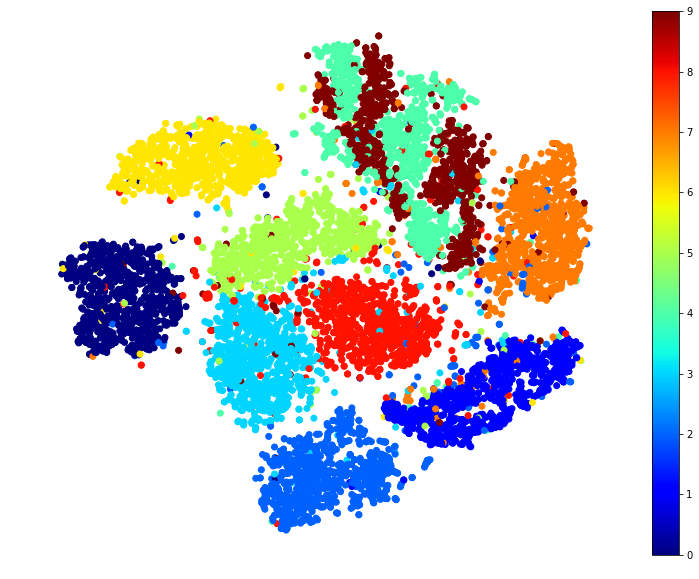

In [23]:
# use 10000 randomly chosen training instances
np.random.seed(42)
m = 10000
idx = np.random.permutation(60000)[:m]
X = mnist['data'][idx]
y = np.array(mnist['target'][idx])
y = [int(i) for i in y]
# import tSNE, establish an instance with a 2D target space, and apply the transform
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)
# plot the resulting data
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

The result is clearly well-clustered. The color map helps to identify the classes. Digits 2, 3, and 5 seem to overlap quite a bit. Let's focus on these for now!

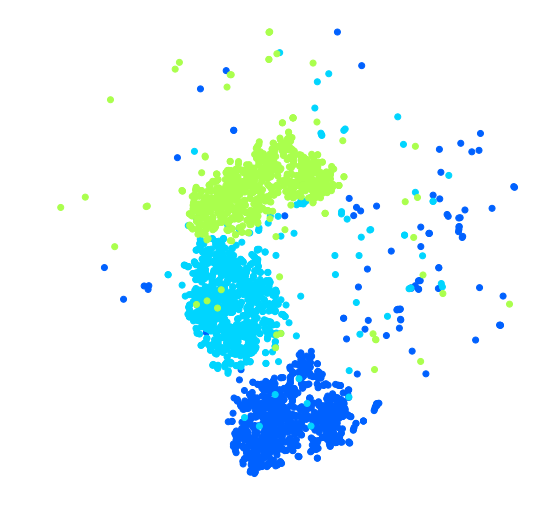

In [24]:
# focus on digits 2, 3, and 5
plt.figure(figsize=(9,9))
cmap = matplotlib.cm.get_cmap("jet")
y = np.array(y)
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y==digit, 0], X_reduced[y==digit, 1], c=cmap(y[y==digit]/9))
plt.axis('off')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


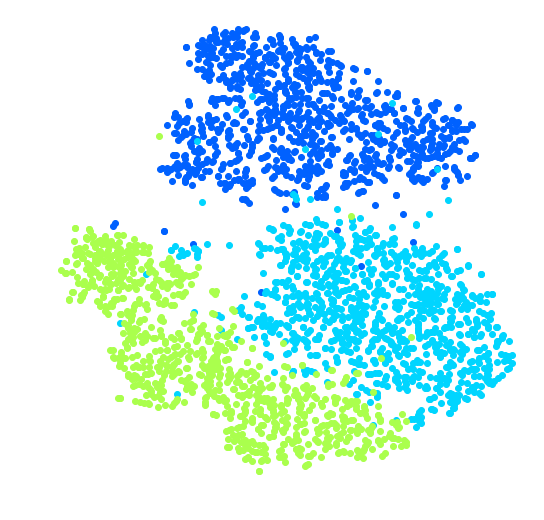

In [25]:
# run tSNE on the 2-3-5-subset of the  data that 
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]
tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)
# plot the results again
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

Having labels printed within the clusters could be very helpful. Let's code a function that does this for us.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

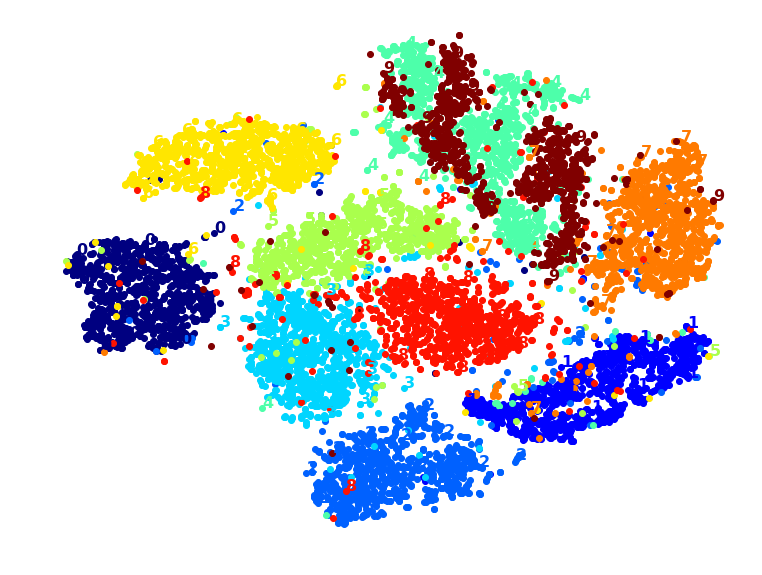

In [26]:
# code taken from Github link above (see the code on Github for details)
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)
plot_digits(X_reduced, y)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

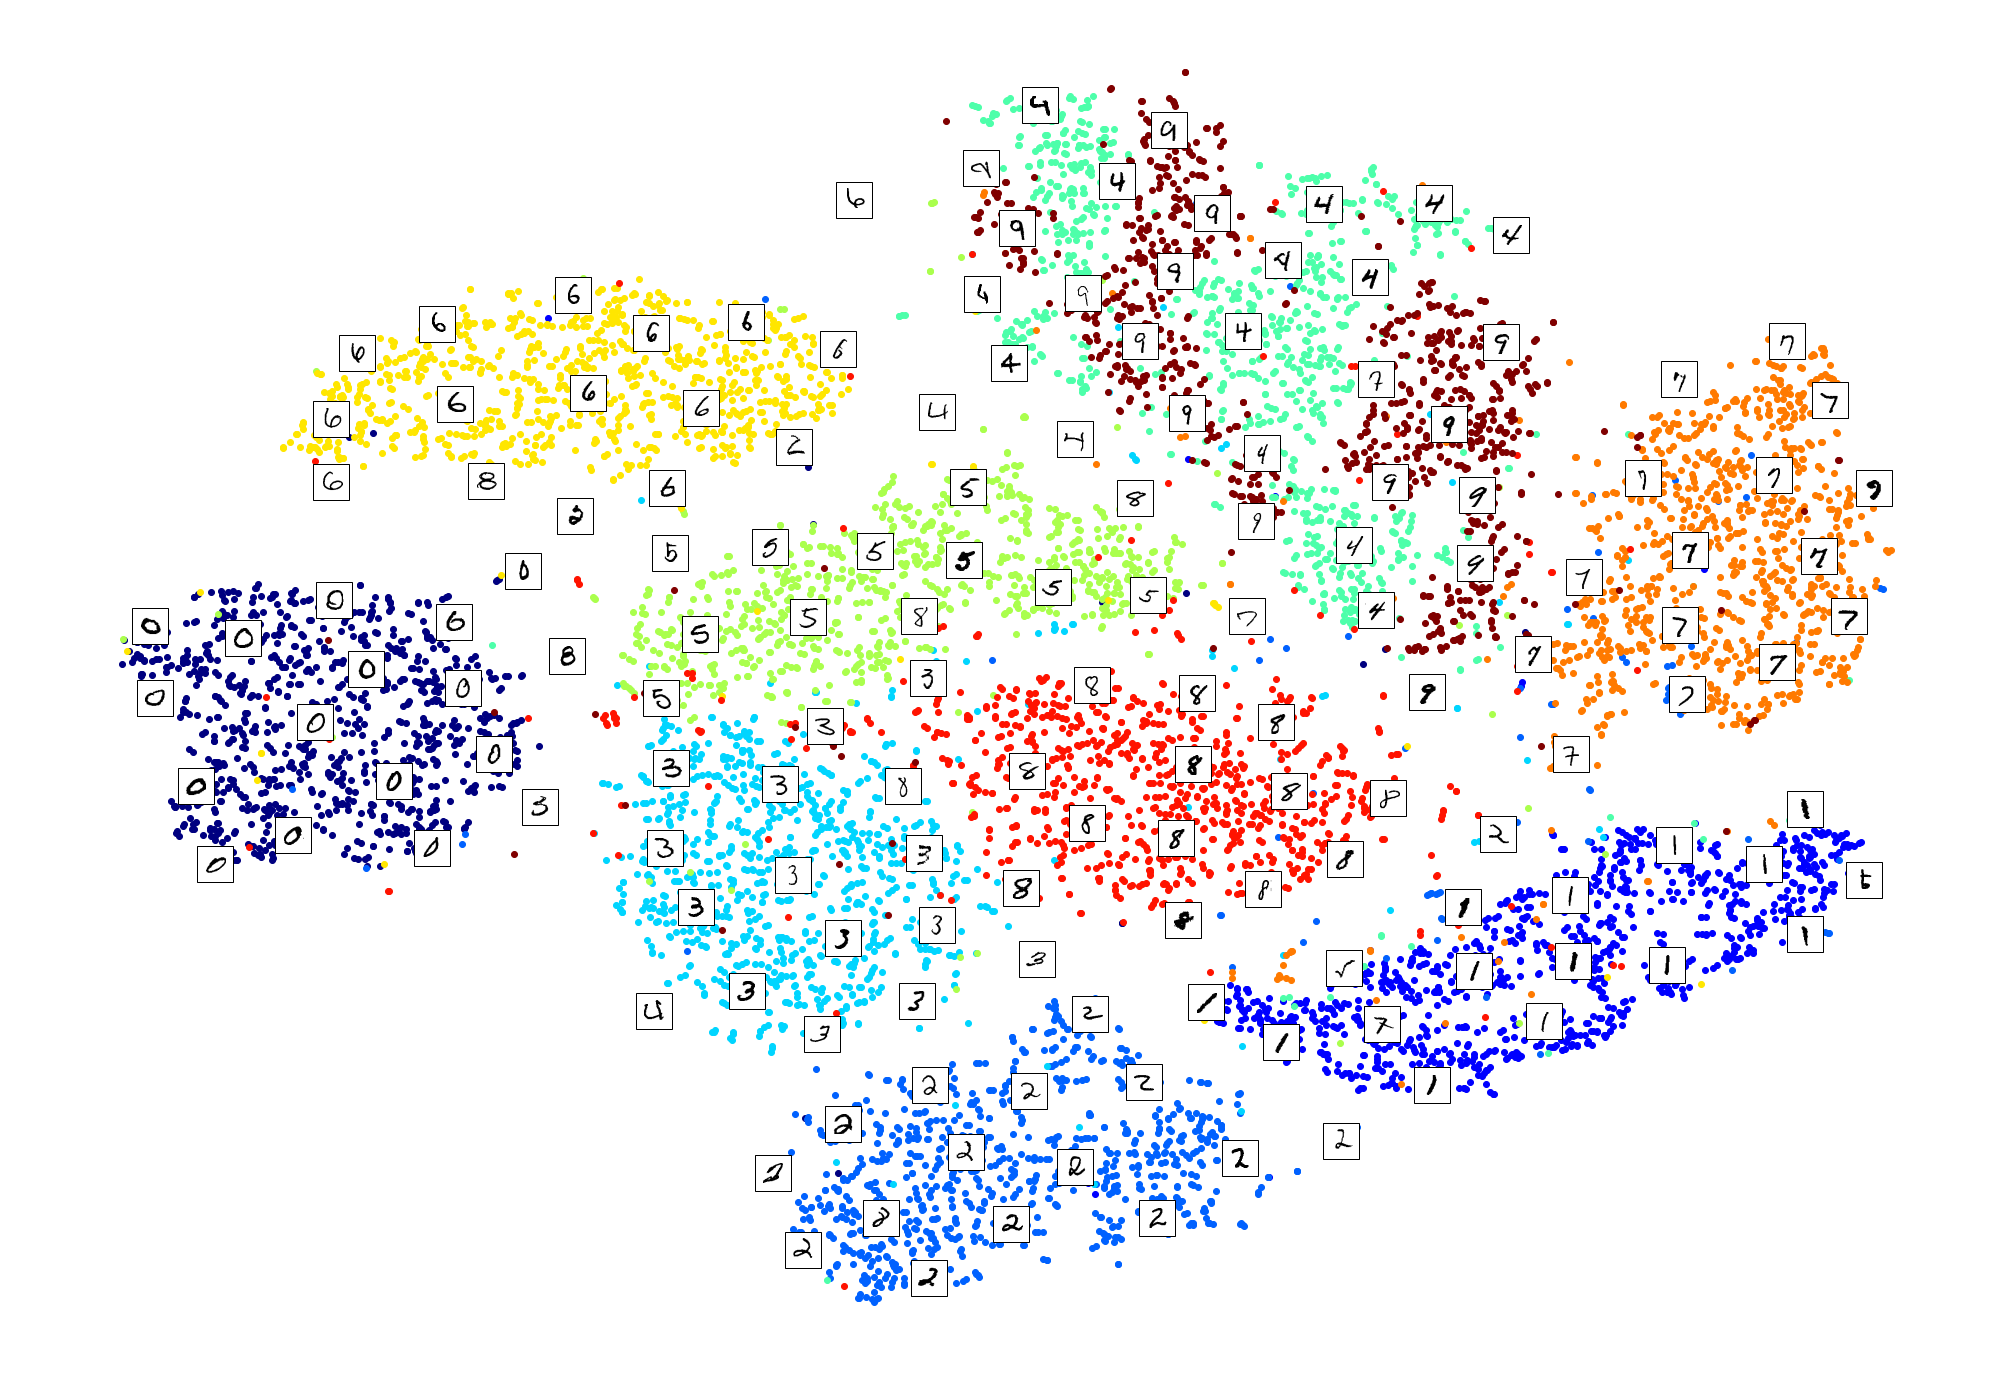

In [27]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25)) # plot miniature digits

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


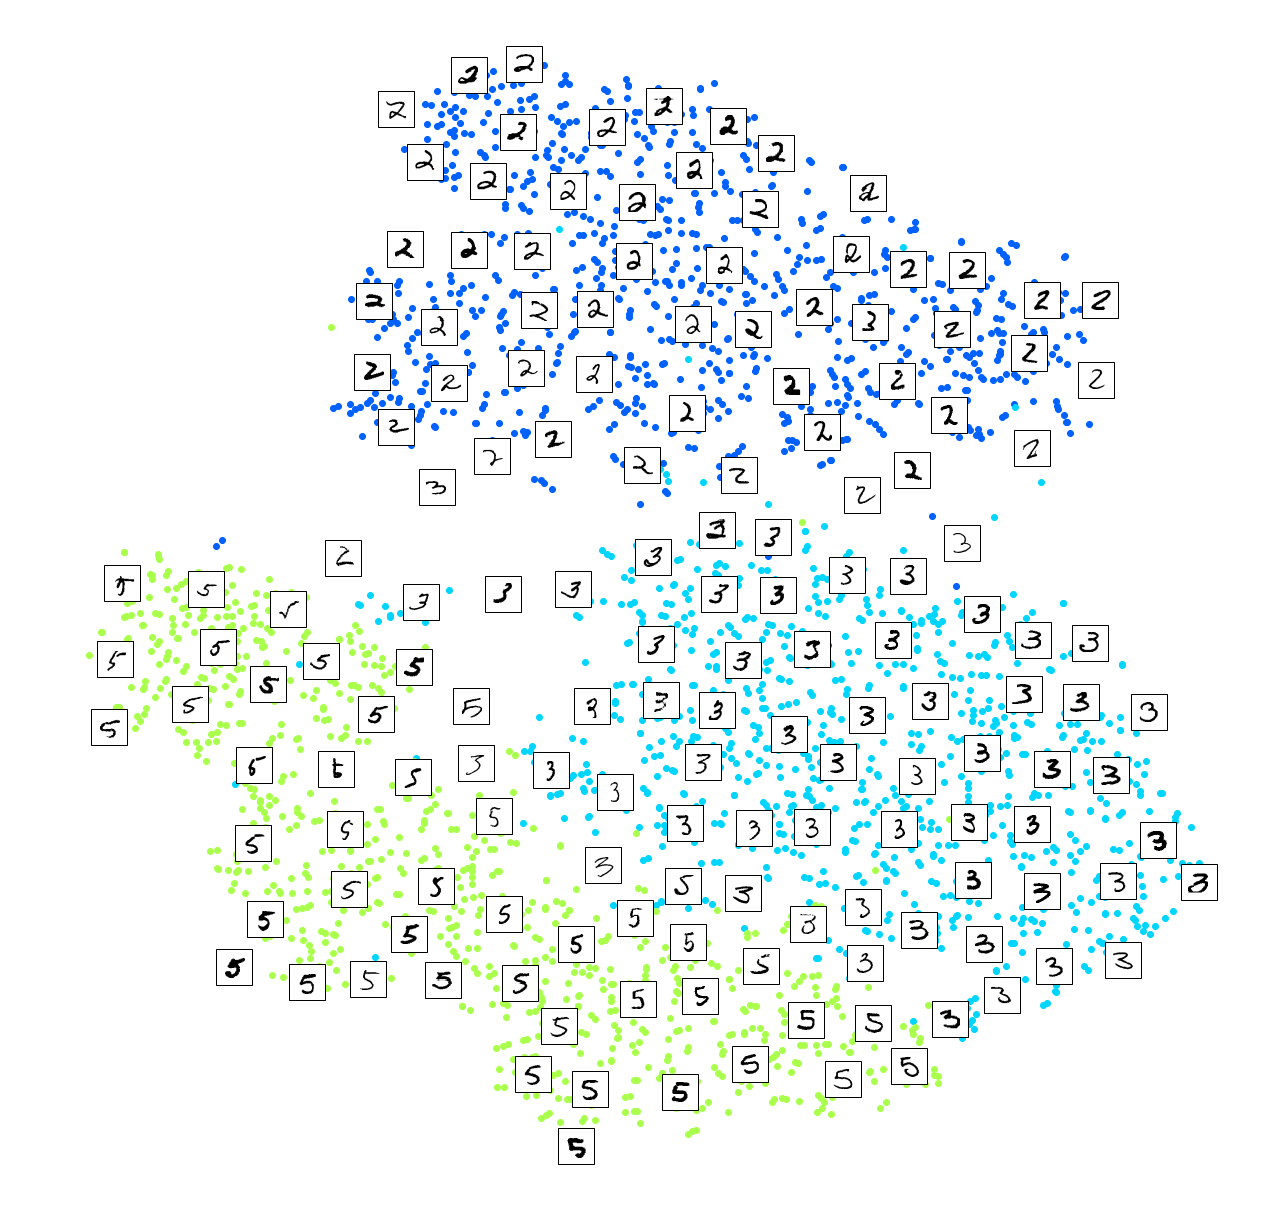

In [28]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22)) # do the above for 2s, 3s, and 5s

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

PCA took 0.1s.


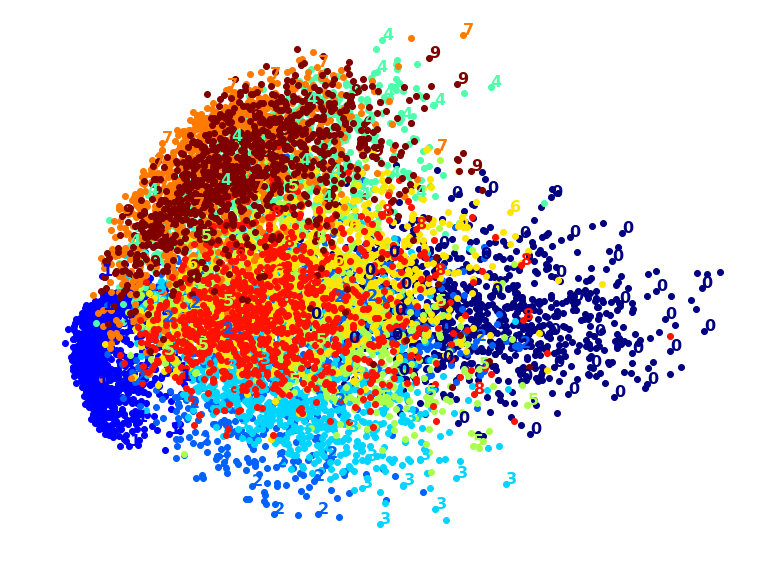

In [29]:
# now, do the same using PCA instead of tSNE
t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

Wow, PCA went super fast! However, the clusters are not well separated.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

LLE took 116.5s.


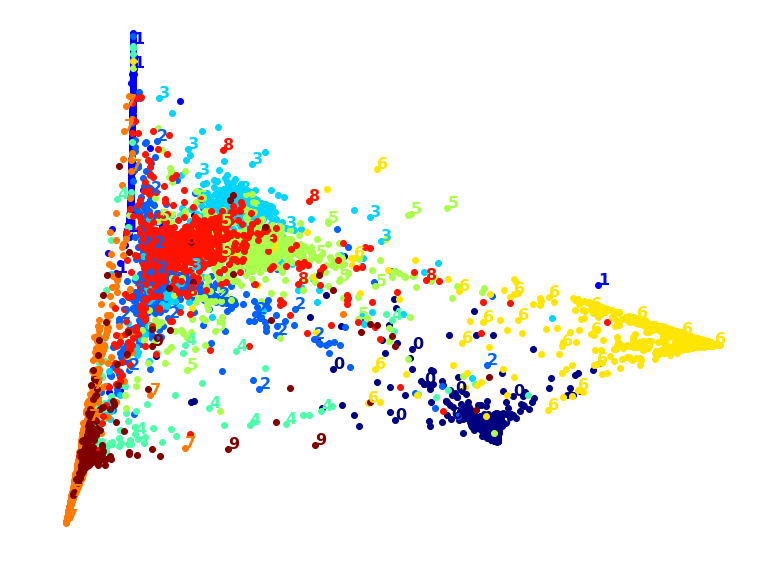

In [30]:
# using LLE
t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

That took quite long and the result not super good, eihter. Let's apply PCA before running LLE!

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

PCA+LLE took 29.8s.


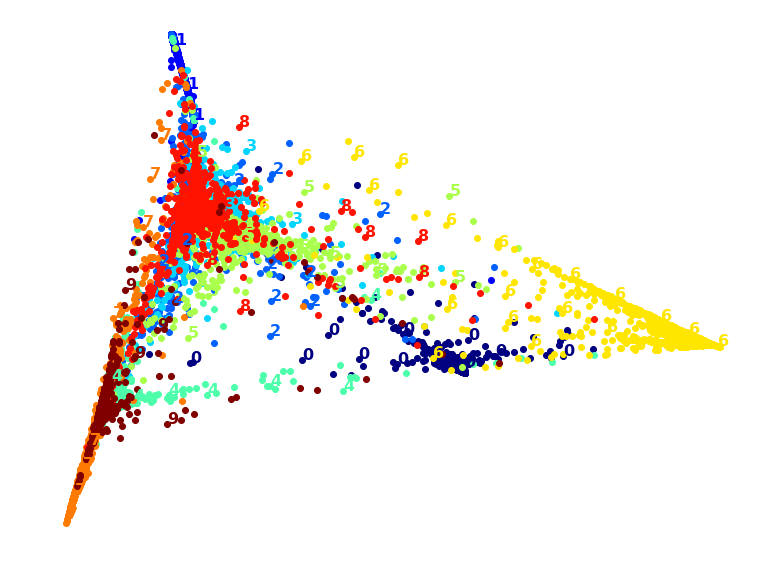

In [31]:
# first PCA, then LLE
pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

This went a bit more than twice as fast but the result is still not convincing. Let's try MDS (Multidimensional Scaling)!

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

MDS took 55.2s (on just 2,000 MNIST images instead of 10,000).


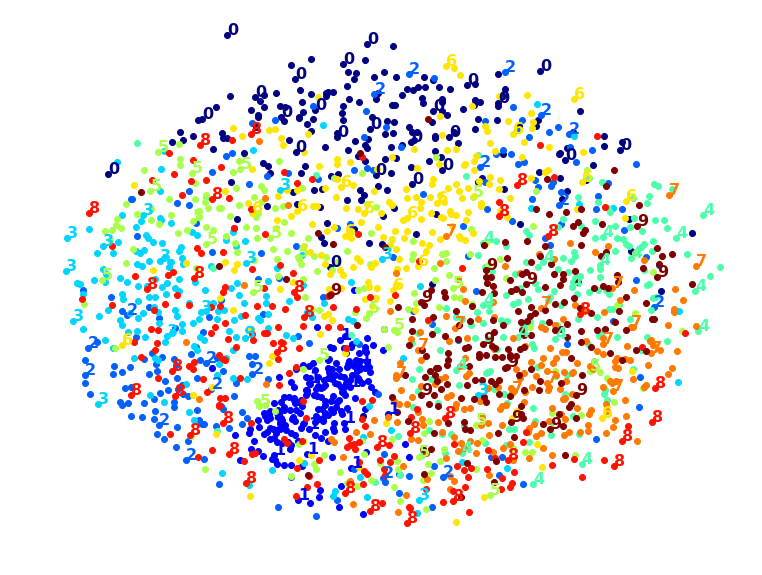

In [32]:
# MDS takes a lot of time so we only use 2000 instances for this algorithm
from sklearn.manifold import MDS
m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

That still took a lot of time and the classes are all over the place. Let's chain together PCA and MDS!

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

PCA+MDS took 55.3s (on 2,000 MNIST images).


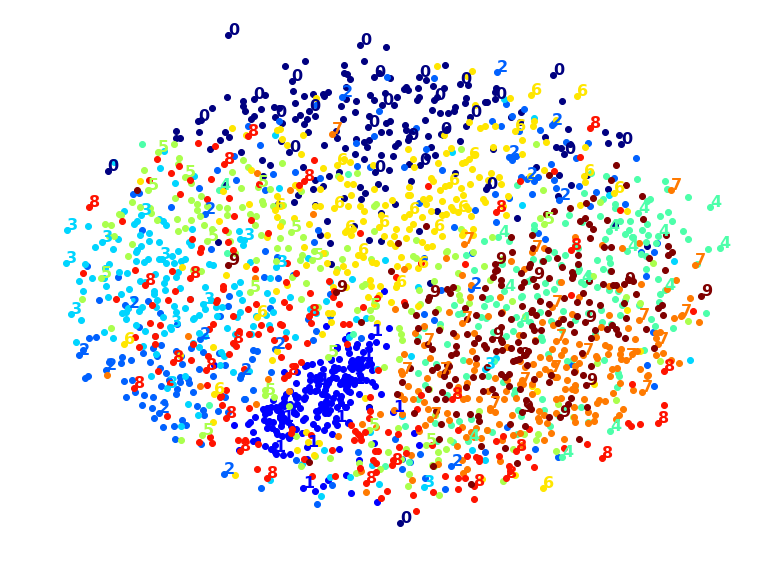

In [33]:
# first PCA, then MDS
pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()

Similar result and similar time: PCA did not change much. Let's try Discriminant Analysis!

/home/matthias/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA 

LDA took 0.9s.


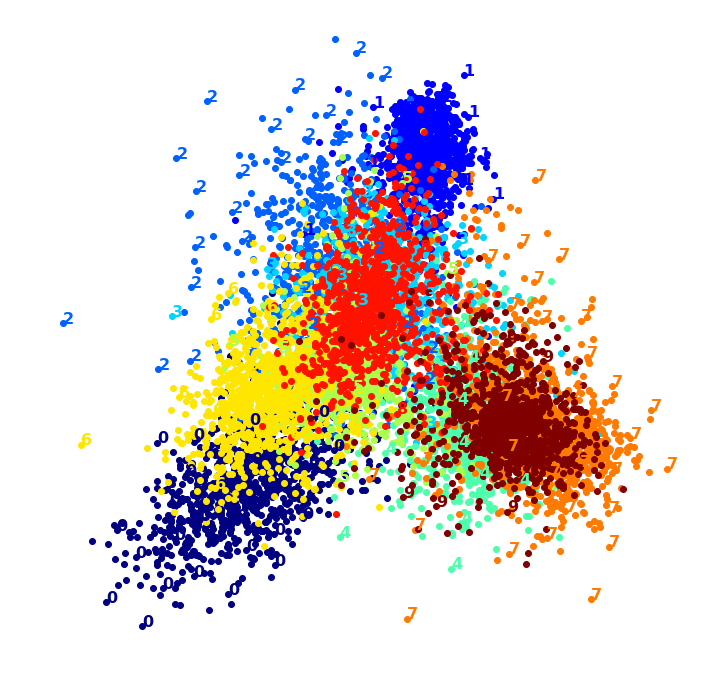

In [34]:
# use linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

This went really fast and the result looks promising. However the clusters overlap way to much. Maybe, this could be improved significantly with a little data preparation. However, we move back to t-SNE because above, we did not check the timing for t-SNE.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

t-SNE took 168.7s.


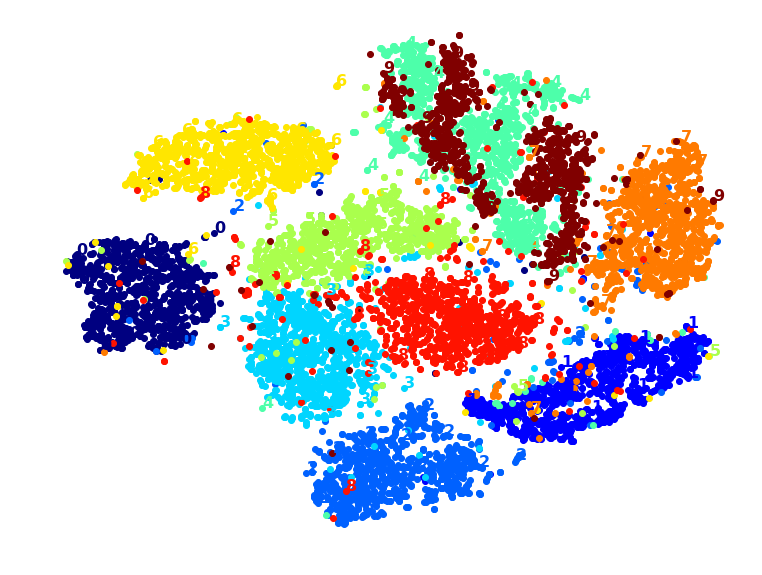

In [35]:
# use t-SNE and check the timing
t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()

We already knew that the result would look like this. This is really great but a speed-up would be very valuable. Let's chain together PCA and t-SNE!

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

PCA+t-SNE took 88.8s.


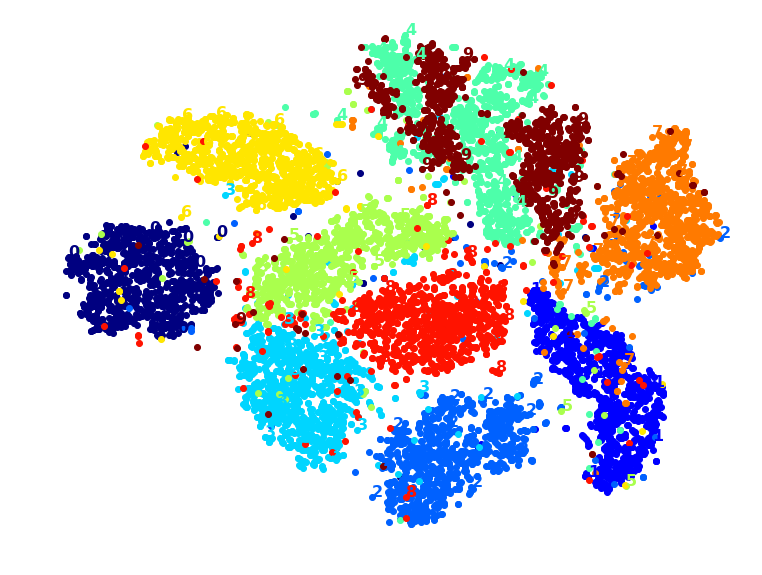

In [36]:
# PCA, followed by t-SNE
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

There is a significant speed-up and the result still looks very good. This might be worth optimizing. And maybe LDA, too.